# Loading the Libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [9]:
train_test_file_path="../evaluation/modeldata-training-and-testing.csv"

In [13]:
all_data = pd.read_csv(train_test_file_path, sep=",", header=0)

In [18]:
all_data.head(5);

# Preprocessing & Housekeeping

In [15]:
def clear_na_data(data):
    # Remove rows with NaN values
    data = data.dropna()
    return data

In [25]:
def shuffle_all_data(data):
    # Shuffle the data
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    return data

In [26]:
cleaned_data=clear_na_data(all_data)
shuffled_data = shuffle_all_data(cleaned_data)

In [27]:
shuffled_data.head(5)

,className,ReadingEase,ReadingEase(NL),StopwordRatio,StopKeyRatio,QuestionRatio,CodeElementRatio,ConceptualSimilarity,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity
0,nu,100.000000,100.000000,0.000000,0.000000,0.0,1.000000,0.000000,37,1,315.0,1,40,444,53.0,1.000000
1,u,99.491786,99.491786,0.521739,0.521739,1.0,0.043478,0.271041,0,0,3488.0,1,10,1800,305.0,0.540985
2,nu,78.872857,100.000000,0.625000,0.625000,0.0,0.250000,0.000000,0,0,889.0,1,2,1994,349.0,0.235341
3,u,80.465000,100.000000,0.347826,0.347826,0.0,0.347826,0.166282,0,0,511.0,1,13,143,11.0,0.000000
4,u,100.000000,100.000000,0.000000,0.000000,0.0,1.000000,0.000000,0,0,456.0,1,4,916,97.0,0.000000


# Data Preperation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(shuffled_data.drop(columns=['className']), shuffled_data['className'], test_size=0.2, random_state=42)

In [30]:
X_train.shape

(868, 15)

# Model using Textual Features

In [32]:
def get_textual_features_only(data_frame):
    # Select only the textual features
    textual_features = data_frame[['ReadingEase', 'ReadingEase(NL)', 'StopwordRatio', 'QuestionRatio', 'CodeElementRatio', 'ConceptualSimilarity']]
    return textual_features

In [33]:
X_train_textual = get_textual_features_only(X_train)
X_test_textual = get_textual_features_only(X_test)

In [36]:
def get_textual_only_model():
    model_rf_textual = RandomForestClassifier(n_estimators=2000,   random_state=42)
    model_rf_textual.fit(X_train_textual, y_train)
    return model_rf_textual 

In [42]:
def evaluate_rf_model(trained_model, X_test, y_test):
    trained_model_predictions = trained_model.predict(X_test)
    accuracy = accuracy_score(y_test, trained_model_predictions) 
    precision = precision_score(y_test, trained_model_predictions, average='weighted')
    recall = recall_score(y_test, trained_model_predictions, average='weighted')
    f1 = f1_score(y_test, trained_model_predictions, average='weighted')
    return accuracy, precision, recall, f1

In [37]:
model_rf_textual = get_textual_only_model()

In [43]:
evaluate_rf_model(model_rf_textual, X_test_textual, y_test)

(0.5391705069124424,
 0.5309599473144487,
 0.5391705069124424,
 0.5321623130299438)

In [45]:
def get_cross_validation_score(model_rf_textual_cv, X_train_textual, y_train):
    # Perform cross-validation
    cv_scores = cross_val_score(model_rf_textual_cv, X_train_textual, y_train, cv=10)
    return cv_scores.mean(), cv_scores.std()

In [46]:
model_rf_textual_cv = RandomForestClassifier(n_estimators=2000, random_state=42)

In [47]:
get_cross_validation_score(model_rf_textual_cv, X_train_textual, y_train)

(0.5725608126169474, 0.052481677777014124)

# Model using Developer Experience

In [48]:
def get_developer_exp_features_only(data_frame):
    # Select only the developer experience features
    dev_exp_features = data_frame[['AuthorCommitsFile', 'CommittedTwice', 'TotalAuthoredCommits', 'ReviewingTwice', 'ReviewedCommitsFile', 'TotalReviewedCommits', 'ReviewedPRs','ExtLibSimilarity']]
    return dev_exp_features

In [53]:
X_train_dev_exp_features=get_developer_exp_features_only(X_train)
X_test_dev_exp_features=get_developer_exp_features_only(X_test)

In [54]:
X_train_dev_exp_features.head(5)

,AuthorCommitsFile,CommittedTwice,TotalAuthoredCommits,ReviewingTwice,ReviewedCommitsFile,TotalReviewedCommits,ReviewedPRs,ExtLibSimilarity
522,0,0,695.0,1,4,287,50.0,0.000000
851,1,1,44.0,1,4,80,20.0,0.735575
215,10,1,824.0,1,16,1563,267.0,0.000000
628,0,0,107.0,1,9,209,50.0,0.000000
593,8,1,824.0,1,29,1578,268.0,0.655402


In [55]:
def get_developer_exp_only_model():
    model_rf_dev_exp = RandomForestClassifier(n_estimators=2000, random_state=42)
    model_rf_dev_exp.fit(X_train_dev_exp_features, y_train)
    return model_rf_dev_exp

In [56]:
model_rf_dev_exp = get_developer_exp_only_model()

In [57]:
evaluate_rf_model(model_rf_dev_exp, X_test_dev_exp_features, y_test)

(0.6866359447004609,
 0.6849976376016155,
 0.6866359447004609,
 0.6852871168102586)

In [58]:
model_rf_dev_exp_cv = RandomForestClassifier(n_estimators=2000, random_state=42)

In [59]:
get_cross_validation_score(model_rf_dev_exp_cv, X_train_dev_exp_features, y_train)

(0.6440924886394012, 0.04729264840845876)

# Model using Textual and Developer Experience

In [62]:
def get_combined_features(data_frame):
    # Select both textual and developer experience features
    combined_features = data_frame[['ConceptualSimilarity', 'ReviewedCommitsFile', 'AuthorCommitsFile', 'ExtLibSimilarity','TotalReviewedCommits', 'ReviewedPRs','StopwordRatio']]
    return combined_features    

In [64]:
X_train_combined_features=get_combined_features(X_train)
X_test_combined_features=get_combined_features(X_test)

In [65]:
def get_combined_features_model():
    model_rf_combined = RandomForestClassifier(n_estimators=2000, random_state=42)
    model_rf_combined.fit(X_train_combined_features, y_train)
    return model_rf_combined

In [66]:
model_rf_combined=get_combined_features_model()

In [67]:
evaluate_rf_model(model_rf_combined, X_test_combined_features, y_test)

(0.6866359447004609,
 0.6846997274138543,
 0.6866359447004609,
 0.6847228552297676)

In [68]:
model_rf_combined_cv=RandomForestClassifier(n_estimators=2000, random_state=42)

In [69]:
get_cross_validation_score(model_rf_combined_cv, X_train_combined_features, y_train)

(0.6533680834001604, 0.04635764198315911)

# Model Importance Visualization

In [81]:
def show_model_feature_importances(model, feature_names):
    # Get feature importances
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(len(feature_names)):
        print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

    # Plot the feature importances of the forest
    plt.figure(figsize=(5, 4))
    plt.title("Feature importances")
    plt.bar(range(len(feature_names)), importances[indices], align="center")
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, len(feature_names)])
    plt.show()

Feature ranking:
1. ConceptualSimilarity (0.19745734550118157)
2. StopwordRatio (0.17127137214137714)
3. TotalReviewedCommits (0.16542950735880918)
4. ReviewedPRs (0.1580448760647083)
5. ReviewedCommitsFile (0.14118603945461472)
6. ExtLibSimilarity (0.09075721831059509)
7. AuthorCommitsFile (0.07585364116871399)


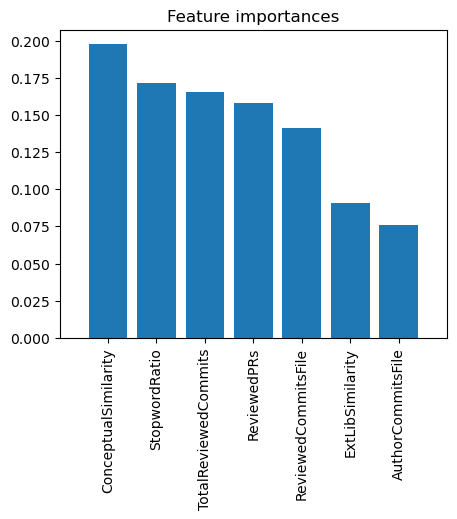

In [85]:
show_model_feature_importances(model_rf_combined, X_train_combined_features.columns)

Feature ranking:
1. ConceptualSimilarity (0.23727423268600245)
2. CodeElementRatio (0.2109699185507835)
3. StopwordRatio (0.20034073335354197)
4. ReadingEase (0.16543299967420247)
5. ReadingEase(NL) (0.13877303829539891)
6. QuestionRatio (0.047209077440070656)


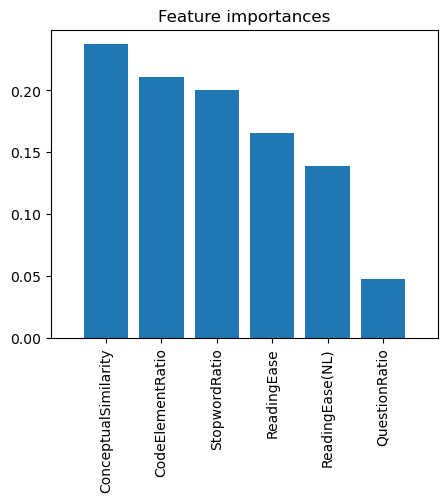

In [86]:
show_model_feature_importances(model_rf_textual, X_train_textual.columns)

Feature ranking:
1. TotalReviewedCommits (0.21478076248303846)
2. ReviewedPRs (0.20549186050852877)
3. ReviewedCommitsFile (0.18352466707751738)
4. TotalAuthoredCommits (0.15834164735589562)
5. ExtLibSimilarity (0.12195684234287175)
6. AuthorCommitsFile (0.08809327568331791)
7. CommittedTwice (0.016556639229908094)
8. ReviewingTwice (0.011254305318922037)


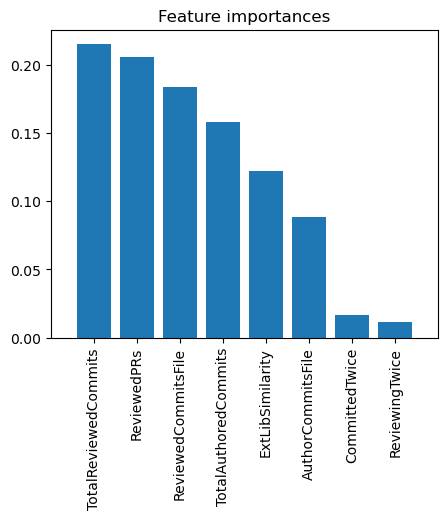

In [87]:
show_model_feature_importances(model_rf_dev_exp, X_train_dev_exp_features.columns)

# Confusion Matrix

In [90]:
confusion_matrix(y_test, model_rf_combined.predict(X_test_combined_features))

array([[57, 38],
       [30, 92]], dtype=int64)

In [91]:
confusion_matrix(y_test, model_rf_textual.predict(X_test_textual))

array([[37, 58],
       [42, 80]], dtype=int64)

In [92]:
confusion_matrix(y_test, model_rf_dev_exp.predict(X_test_dev_exp_features))

array([[58, 37],
       [31, 91]], dtype=int64)